# Canada Consumer Prices

In [1]:
%load_ext autoreload
%autoreload 2

%run relativepath.py
%run commonimports.py
%run displayoptions.py

2019-05-05 19:11:51,177 Property "cache_dir" set to data


In [2]:
cpi_dataset = StatscanZip('https://www150.statcan.gc.ca/n1/tbl/csv/18100004-eng.zip')
cpi_data_alltime = cpi_dataset.get_data()
cpi_data_alltime.REF_DATE = pd.to_datetime(cpi_data_alltime.REF_DATE)
cpi_data_alltime = cpi_data_alltime.set_index('REF_DATE')

2019-05-05 19:11:58,337 Reading file data/18100004.csv


## Inflation since 1998

In [3]:
cpi_data = cpi_data_alltime[(cpi_data_alltime.index > '1997') 
                            & (cpi_data_alltime.GEO =='Canada') 
                            & ((cpi_data_alltime.index.month==1)|(cpi_data_alltime.index== '2018-12-01')) ]

## Summarize

In [4]:
cheapest = cpi_data.tail(1).T
cheapest = cheapest.iloc[1:]
cheapest.columns=['PriceIndex']
cheapest.sort_values('PriceIndex')

,PriceIndex
Digital computing equipment and devices,17.8
Video equipment,22.6
Photographic equipment and supplies,25.2
Audio equipment,46.3
"Home entertainment equipment, parts and services",48.6
Recreational equipment and services (excluding recreational vehicles),50.9
Multipurpose digital devices (201104=100),55.7
Other recreational equipment,70.9
"Non-electric kitchen utensils, tableware and cookware",73.2
Children's clothing,75


In [5]:
CATEGORIES = {'Housing (1986 definition)':'Housing',
              'Tuition fees' :'Tuition',
              'Food':'Food',
              'Health care': 'Healthcare',
              #'Household furnishings and equipment':'Household Furnishings'
              "Home entertainment equipment, parts and services": "Home entertainment",
              'Purchase and leasing of passenger vehicles':'Cars',
              'Child care services':'Childcare', 
              'Toys, games (excluding video games) and hobby supplies':'Toys',
              'Digital computing equipment and devices': 'Computers',
              }
                                    
cpi_categories = cpi_data[list(CATEGORIES.keys())].rename(columns=CATEGORIES)

In [6]:
def scale_to_100(col:pd.Series):
    rescaled = ((col - col[0])/col[0])*100
    return rescaled.round(0)

for col in cpi_categories:
    cpi_categories[col] = scale_to_100(cpi_categories[col])

In [7]:
cpi_categories

,Housing,Tuition,Food,Healthcare,Home entertainment,Cars,Childcare,Toys,Computers
REF_DATE,,,,,,,,,
1998-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-01-01,1.0,8.0,1.0,2.0,-0.0,1.0,2.0,1.0,-29.0
2000-01-01,3.0,15.0,1.0,4.0,-0.0,1.0,4.0,1.0,-43.0
2001-01-01,6.0,19.0,4.0,8.0,-1.0,0.0,-1.0,2.0,-51.0
2002-01-01,8.0,23.0,9.0,10.0,-1.0,-1.0,1.0,-2.0,-62.0
2003-01-01,10.0,29.0,11.0,12.0,-2.0,0.0,-0.0,1.0,-64.0
2004-01-01,12.0,39.0,13.0,13.0,-5.0,-1.0,3.0,-2.0,-70.0
2005-01-01,14.0,45.0,16.0,16.0,-7.0,-0.0,3.0,-3.0,-76.0
2006-01-01,18.0,48.0,19.0,19.0,-10.0,3.0,5.0,-6.0,-80.0


In [8]:
cpi_categories.dropna(axis=0,inplace=True)

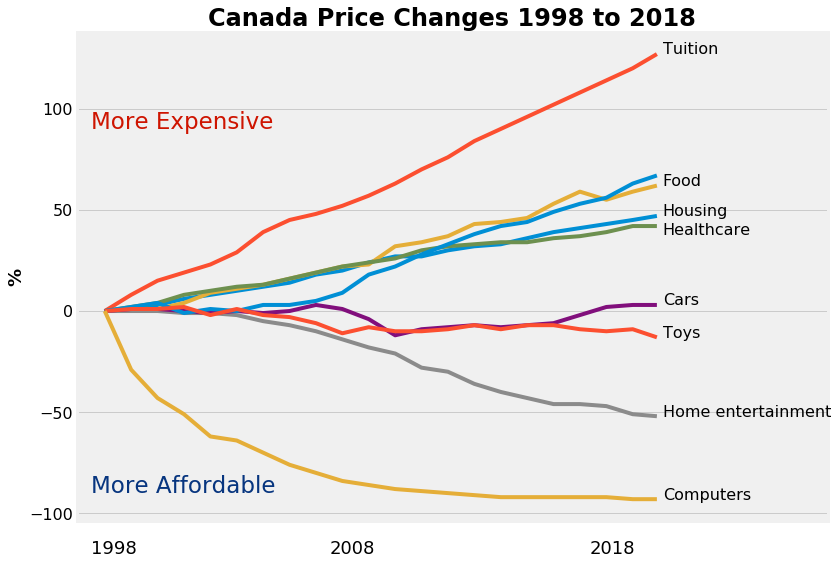

In [9]:
import matplotlib.style as style
import matplotlib.pyplot as plt
style.use('fivethirtyeight')

def add_text(ax, category, offset=0):
    ax.text(y=cpi_categories[category][-1] + offset, x=737110, s=category, fontsize=16)
    
%matplotlib inline

tick_labels = [ '' for year in cpi_categories.index.year]

ax = cpi_categories.plot(figsize=(12,10),legend=False)
ax.set_title('Canada Price Changes 1998 to 2018', fontsize=24, fontweight='bold')

ax.yaxis.set_tick_params(labelsize=16)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_ylabel('%', fontsize=18, fontweight='bold')
ax.grid(False, axis='x')
ax.set_xlim((729000, 739400))
ax.set_xlabel('')
ax.set_xticklabels([])
add_text(ax, 'Tuition')
add_text(ax, 'Housing')
add_text(ax, 'Food')
add_text(ax, 'Healthcare', -4)
add_text(ax, 'Cars')
add_text(ax, 'Toys')
add_text(ax, 'Computers')
add_text(ax, 'Home entertainment')
ax.text(s='More Affordable', y=-90, x=729200, fontsize=23, color='#07357f')
ax.text(s='More Expensive', y=90, x=729200, fontsize=23, color='#ce1400');

# X Labels
ax.text(s='1998', y=-120, x=729200, fontsize=18);
ax.text(s='2008', y=-120, x=732500, fontsize=18);
ax.text(s='2018', y=-120, x=736100, fontsize=18);